<a href="https://colab.research.google.com/github/JulioCastillo1/TP1-Datos/blob/master/FINGERS/Densidad%20de%20probabilidad%20de%20longitud%20de%20tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%pylab inline

url='https://raw.githubusercontent.com/JulioCastillo1/TP1-Datos/master/train.csv'
tweets = pd.read_csv(url)
tweets.head()

Populating the interactive namespace from numpy and matplotlib


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
tweets['word count'] = tweets['text'].map(lambda x: len(x.split()))
real = tweets.loc[tweets['target'] == 1]
fake = tweets.loc[tweets['target'] == 0]

grouped = tweets.groupby('target').agg({'word count':['min','mean','max']})
difference = grouped.iloc[0]-grouped.iloc[1]
difference = difference.reset_index()
difference = difference.drop('level_0',axis = 1)
difference.columns = ['function','difference']
difference = difference.set_index('function')
difference['positive'] = difference['difference'] > 0

[Text(0, 0, '0.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0')]

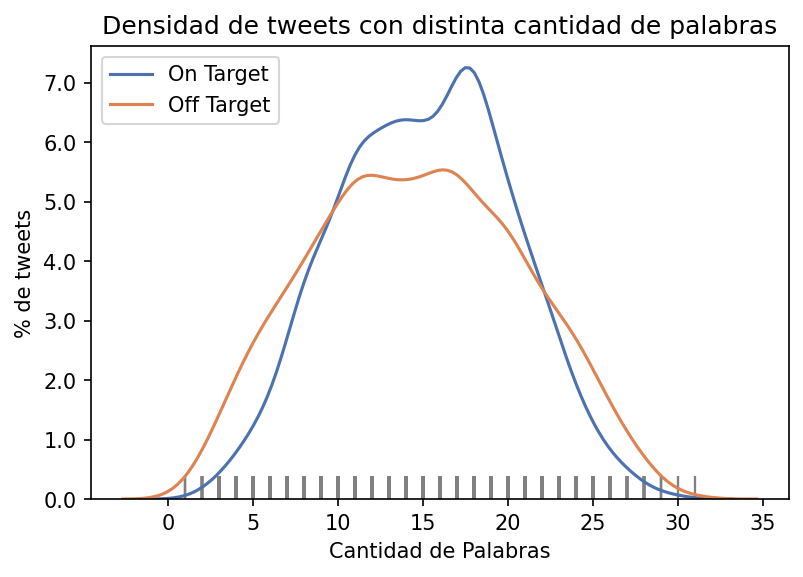

In [15]:
plt.rcParams['figure.dpi'] = 150
fig,ax = plt.subplots()
#plt.rcParams['figure.figsize']=[25.0,7.0]
#plt.rcParams.update({'font.size':22})

sns.distplot(real['word count'], hist = False, color = ListedColormap(sns.color_palette('deep'))(0), label = True)
sns.distplot(fake['word count'], hist = False, color = ListedColormap(sns.color_palette('deep'))(1), rug = True, rug_kws={'color':'grey'}, label = True)
plt.xlabel('Cantidad de Palabras')
plt.ylabel('% de tweets')
plt.title('Densidad de tweets con distinta cantidad de palabras')
plt.legend(loc = 'upper left',labels=['On Target','Off Target'])

a=(ax.get_yticks()*100).tolist()
a[7] = 7.0
ax.set_yticklabels(a)